In [1]:
from PIL import Image
import numpy as np
import networkx as nx
from utils import *

In [3]:
say('stai zitto', to_file=False)

In [3]:
dir = 'C:/Users/aurel/Downloads/HS23/CIR/Automatic-Cart/ImageToGraph/'
imagedir = dir+'Model3.png'
image = np.array(Image.open(imagedir).convert('RGB')) #Remember that it reads row by row
image = image[10:210,10:210,:] #Keep only the superkarmet plan inside the frame
#node_image = image.reshape(-1,3) #Reshape the image shuch that the inidices are 1D
graph = create_graph(image)

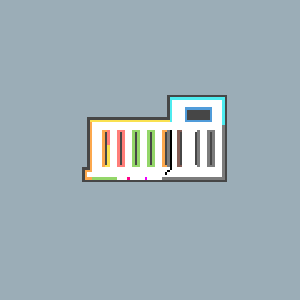

In [6]:
start = (92,107)
end = (110,105)
#Note, I am providing the index from aseprite and converting it to the numpy one
#start = (start[1] - 10, start[0] - 10)
#end = (end[1] - 10, end[0] - 10)
path = nx.dijkstra_path(graph, start, end)
draw_path(image, [path])

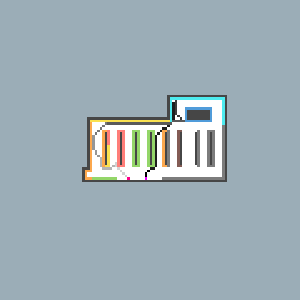

In [7]:
items = ["Biscuits","Eclairs","Meatballs","Rice milk","Frozen clams","Herring","Bell peppers",]
     
items,coordinates,lenght = hamiltonian_path(graph, items) #For now the output will still be in coordinates and not items

paths = [nx.dijkstra_path(graph, coordinates[i], coordinates[i+1]) for i in range(len(coordinates)-1)]
draw_path(image, paths)

In [4]:
import random
import time

item_coordinate = get_coordinates("Biscuits", graph, False)[0]

num_iterations = 2  # Change this to the desired number of iterations
times = []
for _ in range(num_iterations):
    # Get a random node from the graph
    random_node = random.choice(list(graph.nodes()))
    start_time = time.time()
    directions_to_next_item(graph, image, random_node, item_coordinate)
    # Record the ending time
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    times.append(elapsed_time)
    # Wait for 2 seconds
    #time.sleep(5)
print(np.mean(times))
print(np.max(times))

1.5603585243225098
1.7348318099975586


In [15]:
arr = np.array([255,255,255]) 
print(np.all(arr==255))

False


In [19]:
def replace_color_with_black(pixels, target_color):
    width, height,_ = pixels.shape
    

    # Loop through each pixel
    for x in range(width):
        for y in range(height):
            current_color = pixels[x, y]
            if tuple(current_color) == target_color:
                pixels[x, y] = [0, 0, 0]  # Replace with black
            else:
                pixels[x, y] = [255, 255, 255]  # Turn others to white

        # Save the modified image
    image = Image.fromarray(pixels)
    image.save("output_image.png")
    print("Image processed and saved as 'output_image.png'.")


# Example usage:
# Specify the path to your image and the target color to replace
target_color = (70,70,70)  # Example: Replace red (255, 0, 0) with black
replace_color_with_black(image, target_color)

Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and saved as 'output_image.png'.
Image processed and 

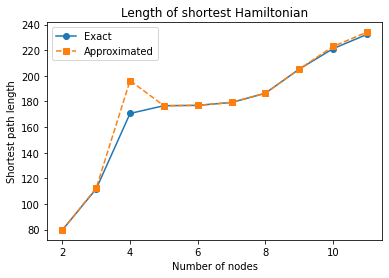

In [164]:
import matplotlib.pyplot as plt

lengths_perm = [79.71875, 111.796875, 170.609375, 176.640625, 176.921875, 179.171875, 186.375, 205.1484375, 221.1328125, 232.2265625]
length_greedy = [79.71875, 112.390625, 196.234375, 176.640625, 176.921875, 179.171875, 186.375, 205.1484375, 222.8828125, 233.9765625]
x = list(range(2,12))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first dataset
ax.plot(x, lengths_perm, label='Exact', marker='o', linestyle='-')

# Plot the second dataset
ax.plot(x, length_greedy, label='Approximated', marker='s', linestyle='--')

# Add labels and a legend
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Shortest path length')
ax.set_title('Length of shortest Hamiltonian')
ax.legend()

# Display the plot
plt.show()

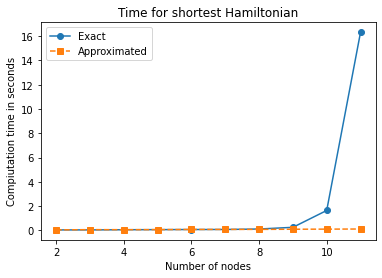

In [165]:
lengths_perm = [0.03599667549133301, 0.03659677505493164, 0.051003217697143555, 0.05908346176147461, 0.06891369819641113, 0.07300186157226562, 0.11011624336242676, 0.250058650970459, 1.6385531425476074, 16.322131156921387]
length_greedy = [0.03799772262573242, 0.05859827995300293, 0.05594515800476074, 0.060080766677856445, 0.07491755485534668, 0.07799625396728516, 0.08000040054321289, 0.09199905395507812, 0.10014867782592773, 0.11034750938415527]
x = list(range(2,12))

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the first dataset
ax.plot(x, lengths_perm, label='Exact', marker='o', linestyle='-')

# Plot the second dataset
ax.plot(x, length_greedy, label='Approximated', marker='s', linestyle='--')

# Add labels and a legend
ax.set_xlabel('Number of nodes')
ax.set_ylabel('Compiutation time in seconds')
ax.set_title('Time for shortest Hamiltonian')
ax.legend()

# Display the plot
plt.show()